# part 3



## Jessica Llanos 327083184 Rita Kaplan 321775579

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import metrics  
from pprint import pprint
#from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from IPython.display import Image 
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn import svm
from scipy import stats 
import pydotplus
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [2]:
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import ADASYN

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics  
from sklearn.svm import SVC
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"./marketing_campaigns_train_after_PRE.csv", index_col = 0)
df.head()

status  n_contact  p_outcome  n_p_contact  education1  profession1  \
0       2          2          0            1         3.0            4   
1       2          1         -1            0         2.0            8   
2       2          1         -1            0         2.0            7   
3       2          1         -1            0         2.0           10   
4       2          2         -1            0         3.0            9   

   device1  conntacted_before  n_child1  call_bin  age_norm  account_norm  \
0        1                  1      -1.0       2.0 -0.837848     -0.339147   
1        1                  0       1.0       4.0  0.389623      0.040277   
2        0                  0       2.0       1.0  1.239411      0.585492   
3        1                  0      -1.0       0.0 -1.026689     -0.255155   
4        1                  0      -1.0       0.0 -0.082481     -0.785398   

   subscribed1  loan1  mortgage1  credit1  
0            0      0          1        0  
1            0      0          1        0  
2            0      0          1        0  
3            0      1          1        0  
4            0      1          1        1

In [5]:
X = df.drop('subscribed1', axis=1)
y = df['subscribed1']

In [6]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=42) 

In [7]:
X_test = df_test.drop('subscribed1', axis=1)
X_train = df_train.drop('subscribed1', axis=1)
y_test = df_test['subscribed1']
y_train = df_train['subscribed1']

saving the split for the cross validation

In [8]:
num_0 = len(df[df['subscribed1']==0])
num_1 = len(df[df['subscribed1']==1])
print(num_0,num_1)

26997 3520


we can see our targed class isn't balanced 

In [9]:
maj_train = len(df_train[df_train['subscribed1']==0])
min_train = len(df_train[df_train['subscribed1']==1])
print(maj_train,min_train)

20251 2636


same goes for the train data.

we do the split before approching balancing the class for the sampling for train and test will represent the distribution as same as the main dataset

In [10]:
train_dist = min_train/(min_train+maj_train)*100
orig_dist = num_1/(num_0+num_1)*100
print(train_dist,orig_dist)

11.517455323983047 11.53455451060065


### undersampled train 

In [11]:
undersampled_train = pd.concat([df_train[df_train['subscribed1']==0].sample(min_train), df_train[df_train['subscribed1']==1]])
print(undersampled_train['subscribed1'].value_counts())

1    2636
0    2636
Name: subscribed1, dtype: int64


In [12]:
X_undersample = undersampled_train.drop('subscribed1', axis=1)
y_undersample = undersampled_train['subscribed1']

_____________________________________________________________________________________________________________

### Cost Sensitive

Confusion matrix: 

|  | predicted negative | predicted positive |
|:--- | :---: | :---: |
| actual negative | TN | FP|
| actual positive | FN | TP|

### $ Loss = fpr\cdot cfp + fnr\cdot cfn $ <br>
- $cfp$: false positive cost
- $cfn$: false negative cost
- $fpr = \frac{fp}{fp+tn}$
- $fnr = \frac{fn}{fn+tp}$

In [14]:
def loss_calc(cm, cfp, cfn):#confusion matrix ,cost fp, cost fn
    fpr = cm[0][1]/(cm[0][1]+cm[0][0])
    fnr = cm[1][0]/(cm[1][0]+cm[1][1])
    return fpr*cfp + fnr*cfn

In [15]:
cost_fp = 1
cost_fn = 15

$ t = \frac{cfp}{cfp+cfn}$

In [16]:
t = cost_fp/(cost_fp+cost_fn)
t

0.0625

#### Decision Tree 

we chose the best parameters in DT that we found in part 2 for best results

In [17]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='best',
                              max_depth=8, min_samples_split=7,
                              min_samples_leaf=18, random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test,y_pred)
acc = metrics.accuracy_score(y_test,y_pred)
pd.DataFrame(cm)

0    1
0  6634  112
1   664  220

decision tree with consideration of the cost with giving different weight 

In [18]:
clf_w = DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=8 , min_samples_split=7,
                              min_samples_leaf=18, random_state=42 
                              , class_weight={0:cost_fp,1:cost_fn})
clf_w.fit(X_train,y_train)
y_pred_w = clf_w.predict(X_test)
cm_w = metrics.confusion_matrix(y_test,y_pred_w)
acc_w = metrics.accuracy_score(y_test,y_pred_w)
pd.DataFrame(cm_w)

0     1
0  4242  2504
1    81   803

In [17]:
if acc > acc_w:
    print('The regular DT accuracy is better')
else:
    print('The Cost sensitive DT accuracy is better')
print('Decision Tree classifier accuracy: %.2f' % (acc*100))
print('Cost Sensitive Desicion Tree classifier accuracy: %.2f' % (acc_w*100))    

The regular DT accuracy is better
Decision Tree classifier accuracy: 89.83
Cost Sensitive Desicion Tree classifier accuracy: 66.12


In [18]:
loss = loss_calc(cm, cost_fp, cost_fn)
loss_w = loss_calc(cm_w, cost_fp, cost_fn)
if loss > loss_w:
    print('The Cost sensitive DT loss is better')
else:
    print('The regular DT loss is better')
print('Decision Tree Classifier loss: %.2f' %loss)
print('Cost Sensitive Desicion Tree Classifier loss: %.2f' %loss_w)

The Cost sensitive DT loss is better
Decision Tree Classifier loss: 11.28
Cost Sensitive Desicion Tree Classifier loss: 1.75


decision tree with consideration of the cost using threshold

In [19]:
y_prob = clf.predict_proba(X_test)
y_pred_t = [0 if p[1]<t else 1 for p in y_prob]
cm_t = metrics.confusion_matrix(y_test,y_pred_t)
acc_t = metrics.accuracy_score(y_test,y_pred_t)
loss_t = loss_calc(cm_t,cost_fp,cost_fn)
pd.DataFrame(cm_t)

0     1
0  4248  2498
1    88   796

In [20]:
print('Accuracy comparison:')
print('Decision Tree: %.2f' % (acc*100))
print('class_weight method: %.2f' % (acc_w*100)) 
print('threshold method: %.2f' % (acc_t*100) )
print('------------------------------------')
print('Loss comparison:')
print('Decision Tree: %.2f' % loss)
print('class_weight method: %.2f' % loss_w) 
print('threshold method: %.2f' % loss_t)

Accuracy comparison:
Decision Tree: 89.83
class_weight method: 66.12
threshold method: 66.11
------------------------------------
Loss comparison:
Decision Tree: 11.28
class_weight method: 1.75
threshold method: 1.86


we can see that still the best of the DT is when we use the class weight method to consider the cost

same for undersampled train data : 

In [19]:
clf_us = DecisionTreeClassifier(criterion='entropy', splitter='best',
                              max_depth=8, min_samples_split=7,
                              min_samples_leaf=18, random_state=42)
clf_us.fit(X_undersample,y_undersample)
y_pred_us = clf_us.predict(X_test)
cm_us = metrics.confusion_matrix(y_test,y_pred_us)
acc_us = metrics.accuracy_score(y_test,y_pred_us)
pd.DataFrame(cm_us)

0     1
0  4784  1962
1   140   744

In [20]:
clf_w_us = DecisionTreeClassifier(criterion='entropy', splitter='best',
                              max_depth=8, min_samples_split=7,
                              min_samples_leaf=18, random_state=42, class_weight={0:cost_fp,1:cost_fn})
clf_w_us.fit(X_undersample,y_undersample)
y_pred_w_us = clf_w_us.predict(X_test)
cm_w_us = metrics.confusion_matrix(y_test,y_pred_w_us)
acc_w_us = metrics.accuracy_score(y_test,y_pred_w_us)
pd.DataFrame(cm_w_us)

0     1
0  2029  4717
1    18   866

In [23]:
if acc_us > acc_w_us:
    print('The regular DT accuracy is better')
else:
    print('The Cost sensitive DT accuracy is better')
print('Decision Tree classifier accuracy: %.2f' % (acc_us*100))
print('Cost Sensitive Desicion Tree classifier accuracy: %.2f' % (acc_w_us*100))    

The regular DT accuracy is better
Decision Tree classifier accuracy: 69.42
Cost Sensitive Desicion Tree classifier accuracy: 39.67


In [24]:
loss_us = loss_calc(cm_us, cost_fp, cost_fn)
loss_w_us = loss_calc(cm_w_us, cost_fp, cost_fn)
if loss > loss_w:
    print('The Cost sensitive DT loss is better')
else:
    print('The regular DT loss is better')
print('Decision Tree Classifier loss: %.2f' %loss_us)
print('Cost Sensitive Desicion Tree Classifier loss: %.2f' %loss_w_us)

The Cost sensitive DT loss is better
Decision Tree Classifier loss: 2.23
Cost Sensitive Desicion Tree Classifier loss: 1.15


In [25]:
y_prob_us = clf_us.predict_proba(X_test)
y_pred_t_us = [0 if p[1]<t else 1 for p in y_prob_us]
cm_t_us = metrics.confusion_matrix(y_test,y_pred_t_us)
acc_t_us = metrics.accuracy_score(y_test,y_pred_t_us)
loss_t_us = loss_calc(cm_t_us,cost_fp,cost_fn)
pd.DataFrame(cm_t_us)

0     1
0  2167  4579
1    13   871

In [26]:
print('Accuracy comparison:')
print('Decision Tree: %.2f' % (acc_us*100))
print('class_weight method: %.2f' % (acc_w_us*100)) 
print('threshold method: %.2f' % (acc_t_us*100) )
print('------------------------------------')
print('Loss comparison:')
print('Decision Tree: %.2f' % loss_us)
print('class_weight method: %.2f' % loss_w_us) 
print('threshold method: %.2f' % loss_t_us)

Accuracy comparison:
Decision Tree: 69.42
class_weight method: 39.67
threshold method: 39.82
------------------------------------
Loss comparison:
Decision Tree: 2.23
class_weight method: 1.15
threshold method: 0.90


we can see that using the undersampled training data we get less loss for the weighted desicion tree<br>
and that here the threshold method gives us the best result

clf, clf_w ; clf_us,clf_w_us :{no weight,with weight  ; undersampled no weight , undersampled with weight}

#### Visualize the trees

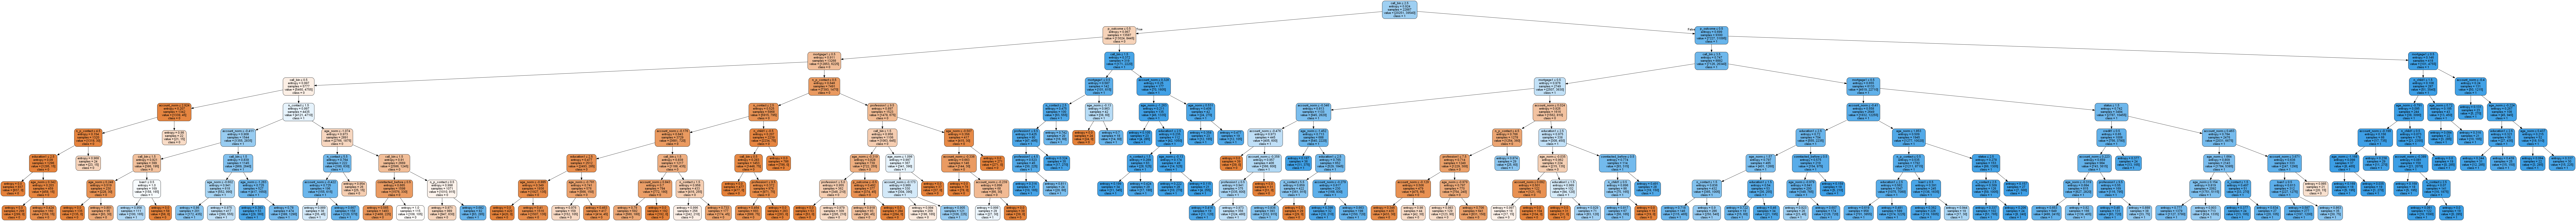

In [23]:
dot = export_graphviz(clf_w, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('clf_w.png')
Image(graph.create_png())

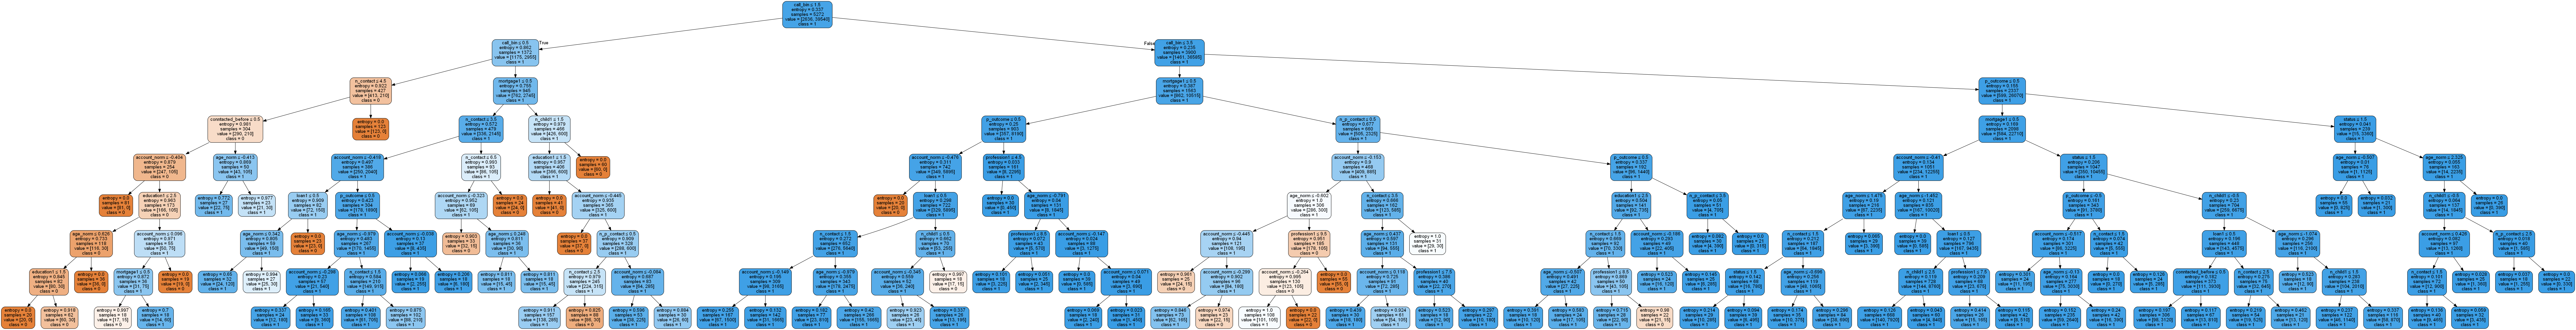

In [24]:
dot = export_graphviz(clf_w_us, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('clf_w_us.png')
Image(graph.create_png())

#### svm

In [30]:
clf_a = svm.SVC(kernel='rbf', C=0.9, probability=True)
clf_a.fit(X_train, y_train)
y_pred_a = clf_a.predict(X_test)
cm_a = metrics.confusion_matrix(y_test,y_pred_a)
acc_a = metrics.accuracy_score(y_test,y_pred_a)
loss_a = loss_calc(cm_a,cost_fp,cost_fn)
display(pd.DataFrame(cm_a))

0   1
0  6719  27
1   787  97

In [31]:
clf_a1 = svm.SVC(kernel='rbf', C=0.9, probability=True,class_weight={0:cost_fp,1:cost_fn})
clf_a1.fit(X_train, y_train)
y_pred_a1 = clf_a1.predict(X_test)
cm_a1 = metrics.confusion_matrix(y_test,y_pred_a1)
acc_a1 = metrics.accuracy_score(y_test,y_pred_a1)
loss_a1 = loss_calc(cm_a1,cost_fp,cost_fn)
display(pd.DataFrame(cm_a1))

0     1
0  3906  2840
1    61   823

In [32]:
y_prob_a = clf_a.predict_proba(X_test)
y_pred_t_a = [0 if p[1]<t else 1 for p in y_prob_a]
cm_t_a = metrics.confusion_matrix(y_test,y_pred_t_a)
acc_t_a = metrics.accuracy_score(y_test,y_pred_t_a)
loss_t_a = loss_calc(cm_t_a,cost_fp,cost_fn)
pd.DataFrame(cm_t_a)

0     1
0  532  6214
1   41   843

In [33]:
print('Accuracy comparison:')
print('SVM: %.2f' % (acc_a*100))
print('class_weight method: %.2f' % (acc_a1*100)) 
print('threshold method: %.2f' % (acc_t_a*100) )
print('------------------------------------')
print('Loss comparison:')
print('SVM: %.2f' % loss_a)
print('class_weight method: %.2f' % loss_a1) 
print('threshold method: %.2f' % loss_t_a)

Accuracy comparison:
SVM: 89.33
class_weight method: 61.98
threshold method: 18.02
------------------------------------
Loss comparison:
SVM: 13.36
class_weight method: 1.46
threshold method: 1.62


we can see that for svm the class weight is better

now the same for the undersample data :

In [34]:
clf_a_us = svm.SVC(kernel='rbf', C=0.9, probability=True)
clf_a_us.fit(X_undersample,y_undersample)
y_pred_a_us = clf_a_us.predict(X_test)
cm_a_us = metrics.confusion_matrix(y_test,y_pred_a_us)
acc_a_us = metrics.accuracy_score(y_test,y_pred_a_us)
loss_a_us = loss_calc(cm_a_us,cost_fp,cost_fn)
display(pd.DataFrame(cm_a_us))

0     1
0  4598  2148
1   118   766

In [35]:
clf_a_us1 = svm.SVC(kernel='rbf', C=0.9, probability=True,class_weight={0:cost_fp,1:cost_fn})
clf_a_us1.fit(X_undersample,y_undersample)
y_pred_a_us1 = clf_a_us1.predict(X_test)
cm_a_us1 = metrics.confusion_matrix(y_test,y_pred_a_us1)
acc_a_us1 = metrics.accuracy_score(y_test,y_pred_a_us1)
loss_a_us1 = loss_calc(cm_a_us1,cost_fp,cost_fn)
display(pd.DataFrame(cm_a_us1))

0     1
0  923  5823
1    2   882

In [36]:
y_prob_a_us = clf_a_us.predict_proba(X_test)
y_pred_t_a_us = [0 if p[1]<t else 1 for p in y_prob_a_us]
cm_t_a_us = metrics.confusion_matrix(y_test,y_pred_t_a_us)
acc_t_a_us = metrics.accuracy_score(y_test,y_pred_t_a_us)
loss_t_a_us = loss_calc(cm_t_a_us,cost_fp,cost_fn)
pd.DataFrame(cm_t_a_us)

0     1
0  1392  5354
1     2   882

In [37]:
print('Accuracy comparison:')
print('SVM: %.2f' % (acc_a_us*100))
print('class_weight method: %.2f' % (acc_a_us1*100)) 
print('threshold method: %.2f' % (acc_t_a_us*100) )
print('------------------------------------')
print('Loss comparison:')
print('SVM: %.2f' % loss_a_us)
print('class_weight method: %.2f' % loss_a_us1) 
print('threshold method: %.2f' % loss_t_a_us)

Accuracy comparison:
SVM: 70.30
class_weight method: 23.66
threshold method: 29.80
------------------------------------
Loss comparison:
SVM: 2.32
class_weight method: 0.90
threshold method: 0.83


we can see that for svm undersampled the threshold is better

#### Random forest

In [38]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
y_predRF = rf.predict(X_test)
cm_rf = metrics.confusion_matrix(y_test,y_predRF)
acc_rf = metrics.accuracy_score(y_test,y_predRF)
loss_rf = loss_calc(cm_rf,cost_fp,cost_fn)
display(pd.DataFrame(cm_rf))

0    1
0  6617  129
1   651  233

In [39]:
rf1 = RandomForestClassifier(random_state = 42,class_weight={0:cost_fp,1:cost_fn} )
rf1.fit(X_train, y_train)
y_predRF1 = rf1.predict(X_test)
cm_rf1 = metrics.confusion_matrix(y_test,y_predRF1)
acc_rf1 = metrics.accuracy_score(y_test,y_predRF1)
loss_rf1 = loss_calc(cm_rf1,cost_fp,cost_fn)
display(pd.DataFrame(cm_rf1))

0    1
0  6618  128
1   684  200

In [40]:
y_prob_rf = rf.predict_proba(X_test)
y_pred_t_rf = [0 if p[1]<t else 1 for p in y_prob_rf]
cm_t_rf = metrics.confusion_matrix(y_test,y_pred_t_rf)
acc_t_rf = metrics.accuracy_score(y_test,y_pred_t_rf)
loss_t_rf = loss_calc(cm_t_rf,cost_fp,cost_fn)
pd.DataFrame(cm_t_rf)

0     1
0  4379  2367
1    90   794

In [41]:
print('Accuracy comparison:')
print('Random Forest: %.2f' % (acc_rf*100))
print('class_weight method: %.2f' % (acc_rf1*100)) 
print('threshold method: %.2f' % (acc_t_rf*100) )
print('------------------------------------')
print('Loss comparison:')
print('Random Forest: %.2f' % loss_rf)
print('class_weight method: %.2f' % loss_rf1) 
print('threshold method: %.2f' % loss_t_rf)

Accuracy comparison:
Random Forest: 89.78
class_weight method: 89.36
threshold method: 67.80
------------------------------------
Loss comparison:
Random Forest: 11.07
class_weight method: 11.63
threshold method: 1.88


we can see that for rf threshold is better

the same with the undersample data :

In [42]:
rf_us = RandomForestClassifier(random_state = 42)
rf_us.fit(X_undersample,y_undersample)
y_predRF_us = rf_us.predict(X_test)
cm_rf_us = metrics.confusion_matrix(y_test,y_predRF_us)
acc_rf_us = metrics.accuracy_score(y_test,y_predRF_us)
loss_rf_us = loss_calc(cm_rf_us,cost_fp,cost_fn)
display(pd.DataFrame(cm_rf_us))

0     1
0  4934  1812
1   154   730

In [43]:
rf1_us = RandomForestClassifier(random_state = 42,class_weight={0:cost_fp,1:cost_fn} )
rf1_us.fit(X_undersample,y_undersample)
y_predRF1_us = rf1_us.predict(X_test)
cm_rf1_us = metrics.confusion_matrix(y_test,y_predRF1_us)
acc_rf1_us = metrics.accuracy_score(y_test,y_predRF1_us)
loss_rf1_us = loss_calc(cm_rf1_us,cost_fp,cost_fn)
display(pd.DataFrame(cm_rf1_us))

0     1
0  5033  1713
1   178   706

In [44]:
y_prob_rf_us = rf_us.predict_proba(X_test)
y_pred_t_rf_us = [0 if p[1]<t else 1 for p in y_prob_rf_us]
cm_t_rf_us = metrics.confusion_matrix(y_test,y_pred_t_rf_us)
acc_t_rf_us = metrics.accuracy_score(y_test,y_pred_t_rf_us)
loss_t_rf_us = loss_calc(cm_t_rf_us,cost_fp,cost_fn)
pd.DataFrame(cm_t_rf_us)

0     1
0  1452  5294
1    12   872

In [45]:
print('Accuracy comparison:')
print('Random Forest: %.2f' % (acc_rf_us*100))
print('class_weight method: %.2f' % (acc_rf1_us*100)) 
print('threshold method: %.2f' % (acc_t_rf_us*100) )
print('------------------------------------')
print('Loss comparison:')
print('Random Forest: %.2f' % loss_rf_us)
print('class_weight method: %.2f' % loss_rf1_us) 
print('threshold method: %.2f' % loss_t_rf_us)

Accuracy comparison:
Random Forest: 74.23
class_weight method: 75.22
threshold method: 30.46
------------------------------------
Loss comparison:
Random Forest: 2.88
class_weight method: 3.27
threshold method: 0.99


we can see that for the undersample data the threshold is better too

#### Logistic Regression

In [46]:
logi = LogisticRegression(random_state = 42)
logi.fit(X_train, y_train)
y_pred_logi = logi.predict(X_test)
cm_logi = metrics.confusion_matrix(y_test,y_pred_logi)
acc_logi = metrics.accuracy_score(y_test,y_pred_logi)
loss_logi = loss_calc(cm_logi,cost_fp,cost_fn)
display(pd.DataFrame(cm_logi))

0    1
0  6677   69
1   726  158

In [47]:
logi1 = LogisticRegression(class_weight={0:cost_fp,1:cost_fn},random_state = 42,max_iter = 200)
logi1.fit(X_train, y_train)
y_pred_logi1 = logi1.predict(X_test)
cm_logi1 = metrics.confusion_matrix(y_test,y_pred_logi1)
acc_logi1 = metrics.accuracy_score(y_test,y_pred_logi1)
loss_logi1 = loss_calc(cm_logi1,cost_fp,cost_fn)
display(pd.DataFrame(cm_logi1))

0     1
0  4084  2662
1    80   804

In [48]:
y_prob_logi = logi.predict_proba(X_test)
y_pred_t_logi = [0 if p[1]<t else 1 for p in y_prob_logi]
cm_t_logi = metrics.confusion_matrix(y_test,y_pred_t_logi)
acc_t_logi = metrics.accuracy_score(y_test,y_pred_t_logi)
loss_t_logi = loss_calc(cm_t_logi,cost_fp,cost_fn)
pd.DataFrame(cm_t_logi)

0     1
0  3981  2765
1    77   807

In [49]:
print('Accuracy comparison:')
print('Logistic Regression: %.2f' % (acc_logi*100))
print('class_weight method: %.2f' % (acc_logi1*100)) 
print('threshold method: %.2f' % (acc_t_logi*100) )
print('------------------------------------')
print('Loss comparison:')
print('Logistic Regression: %.2f' % loss_logi)
print('class_weight method: %.2f' % loss_logi1) 
print('threshold method: %.2f' % loss_t_logi)

Accuracy comparison:
Logistic Regression: 89.58
class_weight method: 64.06
threshold method: 62.75
------------------------------------
Loss comparison:
Logistic Regression: 12.33
class_weight method: 1.75
threshold method: 1.72


we can see that for Logistic Regression the threshold method is better

the same for the undersample data : 

In [50]:
logi_us = LogisticRegression(random_state = 42,max_iter = 200)
logi_us.fit(X_undersample,y_undersample)
y_pred_logi_us = logi_us.predict(X_test)
cm_logi_us = metrics.confusion_matrix(y_test,y_pred_logi_us)
acc_logi_us = metrics.accuracy_score(y_test,y_pred_logi_us)
loss_logi_us = loss_calc(cm_logi_us,cost_fp,cost_fn)
display(pd.DataFrame(cm_logi_us))

0     1
0  4935  1811
1   178   706

In [51]:
logi1_us = LogisticRegression(class_weight={0:cost_fp,1:cost_fn},random_state = 42,max_iter = 200)
logi1_us.fit(X_undersample,y_undersample)
y_pred_logi1_us = logi1_us.predict(X_test)
cm_logi1_us = metrics.confusion_matrix(y_test,y_pred_logi1_us)
acc_logi1_us = metrics.accuracy_score(y_test,y_pred_logi1_us)
loss_logi1_us = loss_calc(cm_logi1_us,cost_fp,cost_fn)
display(pd.DataFrame(cm_logi1_us))

0     1
0  1491  5255
1     3   881

In [52]:
y_prob_logi_us = logi_us.predict_proba(X_test)
y_pred_t_logi_us = [0 if p[1]<t else 1 for p in y_prob_logi_us]
cm_t_logi_us = metrics.confusion_matrix(y_test,y_pred_t_logi_us)
acc_t_logi_us = metrics.accuracy_score(y_test,y_pred_t_logi_us)
loss_t_logi_us = loss_calc(cm_t_logi_us,cost_fp,cost_fn)
pd.DataFrame(cm_t_logi_us)

0     1
0  1128  5618
1     0   884

In [53]:
print('Accuracy comparison:')
print('Logistic Regression: %.2f' % (acc_logi_us*100))
print('class_weight method: %.2f' % (acc_logi1_us*100)) 
print('threshold method: %.2f' % (acc_t_logi_us*100) )
print('------------------------------------')
print('Loss comparison:')
print('Logistic Regression: %.2f' % loss_logi_us)
print('class_weight method: %.2f' % loss_logi1_us) 
print('threshold method: %.2f' % loss_t_logi_us)

Accuracy comparison:
Logistic Regression: 73.93
class_weight method: 31.09
threshold method: 26.37
------------------------------------
Loss comparison:
Logistic Regression: 3.29
class_weight method: 0.83
threshold method: 0.83


we can see that the threshold is still the best for Logistic Regression

----------------------------------------------------------------------------------------------------------------------

### Hyperparameter tuning

from here we will work only with the undersample data

#### Decision Tree

with the class weight :

In [101]:
criterion = ['gini', 'entropy']

max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)

max_features = ['auto', 'log2', 'sqrt', 2, 5, 8]

max_leaf_nodes = [int(x) for x in np.linspace(1, 30, num = 10)]
max_leaf_nodes.append(None)

min_impurity_decrease = [0.0, 0.05, 0.1, 0.15, 0.2]

min_samples_leaf = [1, 2, 5, 10, 15, 20]

min_samples_split = [1, 2, 5, 10, 15, 20]

splitter = ['best', 'random']

class_weight = [{0:cost_fp,1:cost_fn}]

random_grid_clf = {'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'max_leaf_nodes': max_leaf_nodes,
               'min_impurity_decrease': min_impurity_decrease,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'splitter': splitter,'class_weight': class_weight}


In [102]:
clf_random = RandomizedSearchCV(estimator = clf_us,
                                 param_distributions = random_grid_clf,
                                 n_iter = 500, cv = 10,verbose = 2, 
                                 random_state = 42, n_jobs = -1)

clf_random.fit(X_undersample,y_undersample)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 4320 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   11.4s finished


RandomizedSearchCV(cv=10,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=8,
                                                    min_samples_leaf=18,
                                                    min_samples_split=7,
                                                    random_state=42),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'class_weight': [{0: 1, 1: 15}],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         2, 5, 8],
                                        'max_leaf_nodes': [1, 4, 7, 10, 13, 17,
                                                 

In [103]:
clf_random.best_params_

{'splitter': 'random',
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': None,
 'max_features': 8,
 'max_depth': 25,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 15}}

In [109]:
print('base model loss = %.2f' %loss_w_us)

best_random_clf = clf_random.best_estimator_
random_y_pred_clf = best_random_clf.predict(X_test)
cm_w_us_r = metrics.confusion_matrix(y_test,random_y_pred_clf)
loss_w_us_r = loss_calc(cm_w_us_r, cost_fp, cost_fn)
print('random model loss = %.2f' %loss_w_us_r)

print('Improvement of {:0.2f}%.'.format( 100 * (loss_w_us - loss_w_us_r) / loss_w_us))

base model loss = 1.01
random model loss = 1.59
Improvement of -57.27%.


now without the class weight so we will use the threshold method :

In [111]:
criterion = ['gini', 'entropy']

max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)

max_features = ['auto', 'log2', 'sqrt', 2, 5, 8]

max_leaf_nodes = [int(x) for x in np.linspace(1, 30, num = 10)]
max_leaf_nodes.append(None)

min_impurity_decrease = [0.0, 0.05, 0.1, 0.15, 0.2]

min_samples_leaf = [1, 2, 5, 10, 15, 20]

min_samples_split = [1, 2, 5, 10, 15, 20]

splitter = ['best', 'random']

random_grid_clf_t = {'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'max_leaf_nodes': max_leaf_nodes,
               'min_impurity_decrease': min_impurity_decrease,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'splitter': splitter}


In [112]:
clf_random_t = RandomizedSearchCV(estimator = clf_us,
                                 param_distributions = random_grid_clf_t,
                                 n_iter = 500, cv = 10,verbose = 2, 
                                 random_state = 42, n_jobs = -1)

clf_random_t.fit(X_undersample,y_undersample)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 4981 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    8.6s finished


RandomizedSearchCV(cv=10,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=8,
                                                    min_samples_leaf=18,
                                                    min_samples_split=7,
                                                    random_state=42),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         2, 5, 8],
                                        'max_leaf_nodes': [1, 4, 7, 10, 13, 17,
                                                           20, 23, 26, 30,
                                               

In [113]:
clf_random_t.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 20,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': 26,
 'max_features': 8,
 'max_depth': 50,
 'criterion': 'gini'}

In [165]:
y_prob_r = clf_random_t.predict_proba(X_test)
y_pred_t_r = [0 if p[1]<t else 1 for p in y_prob_r]
cm_t_r = metrics.confusion_matrix(y_test,y_pred_t_r)
loss_w_us_r_t = loss_calc(cm_t_r,cost_fp,cost_fn)

In [166]:
print('base model loss = %.2f' %loss_w_us)

print('random model loss = %.2f' %loss_w_us_r_t)

print('Improvement of {:0.2f}%.'.format( 100 * (loss_w_us - loss_w_us_r_t) / loss_w_us))

base model loss = 1.01
random model loss = 0.87
Improvement of 14.17%.


we can see that the threshold is better , with a loss of only 0.87

#### Random Forest

with the class weight :

In [117]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

max_features = ['auto', 'log2', 2, 5, 8]

max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)

min_samples_split = [1, 2, 5, 10, 15, 20]

min_samples_leaf = [1, 2, 5, 10]

max_samples = [0.1, 0.3, 0.5, 0.7, 0.9]

class_weight = [{0:cost_fp,1:cost_fn}]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_samples': max_samples,'class_weight': class_weight}

In [118]:
rf_random = RandomizedSearchCV(estimator = rf_us, param_distributions = random_grid, n_iter = 200, cv = 10,
                               verbose = 2, random_state = 42, n_jobs = -1)

rf_random.fit(X_undersample,y_undersample)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 12.9min finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'class_weight': [{0: 1, 1: 15}],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['auto', 'log2', 2, 5,
                                                         8],
                                        'max_samples': [0.1, 0.3, 0.5, 0.7,
                                                        0.9],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
 

In [119]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_samples': 0.5,
 'max_features': 8,
 'max_depth': 45,
 'class_weight': {0: 1, 1: 15}}

In [120]:
print('base model loss = %.2f' %loss_rf_us)

best_random_rf = rf_random.best_estimator_
random_y_pred_rf = best_random_rf.predict(X_test)
cm_w_us_rf = metrics.confusion_matrix(y_test,random_y_pred_rf)
loss_w_us_rf = loss_calc(cm_w_us_rf, cost_fp, cost_fn)
print('random model loss = %.2f' %loss_w_us_rf)

print('Improvement of {:0.2f}%.'.format( 100 * (loss_rf_us - loss_w_us_rf) / loss_rf_us))

base model loss = 2.73
random model loss = 1.76
Improvement of 35.54%.


Now we'll do a Grid search

In [121]:
param_grid = {'n_estimators': [120,150,170,200],
              'min_samples_split': [1, 2, 3, 5, 7],
              'min_samples_leaf': [2, 3, 5],
              'max_features': ['auto',8, 16],
              'max_depth': [40, 45, 50, 60, None],
              'max_samples': [0.5, 0.6, 0.7],
              'class_weight': [{0:cost_fp,1:cost_fn}]}

grid_search = GridSearchCV(estimator = rf_us, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2)

In [122]:
grid_search.fit(X_undersample,y_undersample)
grid_search.best_params_

Fitting 10 folds for each of 2700 candidates, totalling 27000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

{'class_weight': {0: 1, 1: 15},
 'max_depth': 40,
 'max_features': 8,
 'max_samples': 0.5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [124]:
BGrf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=40,
                              min_samples_split=2, min_samples_leaf=2,
                              max_features=8, random_state=42,class_weight={0:cost_fp,1:cost_fn}, max_samples=0.5)
BGrf.fit(X_undersample,y_undersample)
grid_y_pred = BGrf.predict(X_test)
cm_BGrf = metrics.confusion_matrix(y_test,grid_y_pred)
loss_BGrf = loss_calc(cm_BGrf, cost_fp, cost_fn)
print('base model loss = %.2f' %loss_rf_us)
print('grid model loss = %.2f'%loss_BGrf)
print('Improvement of {:0.2f}%.'.format( 100 * (loss_rf_us - loss_BGrf) / loss_rf_us))

base model loss = 2.73
grid model loss = 1.76
Improvement of 35.54%.


with the threshold method :

In [127]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

max_features = ['auto', 'log2', 2, 5, 8]

max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)

min_samples_split = [1, 2, 5, 10, 15, 20]

min_samples_leaf = [1, 2, 5, 10]

max_samples = [0.1, 0.3, 0.5, 0.7, 0.9]

random_grid_t = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_samples': max_samples}

In [129]:
rf_random1 = RandomizedSearchCV(estimator = rf_us, param_distributions = random_grid_t, n_iter = 200, cv = 10,
                               verbose = 2, random_state = 42, n_jobs = -1)

rf_random1.fit(X_undersample,y_undersample)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 13.5min finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['auto', 'log2', 2, 5,
                                                         8],
                                        'max_samples': [0.1, 0.3, 0.5, 0.7,
                                                        0.9],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
    

In [131]:
rf_random1.best_params_

{'n_estimators': 1000,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_samples': 0.3,
 'max_features': 5,
 'max_depth': 20}

now we will do the grid search :

In [132]:
param_grid1 = {'n_estimators': [850,900,950,1000],
              'min_samples_split': [15, 17, 20, 22, 25],
              'min_samples_leaf': [2, 3, 5],
              'max_features': ['auto',5, 10],
              'max_depth': [20, 25, 30, 40, None],
              'max_samples': [0.2, 0.3, 0.4]}

grid_search1 = GridSearchCV(estimator = rf_us, param_grid = param_grid1, cv = 10, n_jobs = -1, verbose = 2)

In [133]:
grid_search1.fit(X_undersample,y_undersample)
grid_search1.best_params_

Fitting 10 folds for each of 2700 candidates, totalling 27000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 54.6min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 67.0min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 77.0min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 88.3min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

{'max_depth': 25,
 'max_features': 5,
 'max_samples': 0.3,
 'min_samples_leaf': 2,
 'min_samples_split': 25,
 'n_estimators': 850}

In [134]:
y_prob_grid = grid_search1.predict_proba(X_test)
y_pred_grid = [0 if p[1]<t else 1 for p in y_prob_grid]
cm_grid = metrics.confusion_matrix(y_test,y_pred_grid)
loss_grid = loss_calc(cm_grid,cost_fp,cost_fn)

In [158]:
print('base model loss = %.2f' %loss_rf_us)

print('grid model loss = %.2f' %loss_grid)

print('Improvement of {:0.2f}%.'.format( 100 * (loss_rf_us - loss_grid) / loss_rf_us))

base model loss = 2.73
grid model loss = 0.91
Improvement of 66.55%.


we can see that in Random Forest we got the best result with the threshold method and a loss of only 0.91

#### SVM

In [126]:
C = [0.7, 0.8, 0.9, 1]

decision_function_shape = ['ovo', 'ovr']

degree = [2 ,3 ,4]

gamma = ['scale', 'auto']

kernel = ['linear', 'poly', 'rbf', 'sigmoid']

class_weight = [{0:cost_fp,1:cost_fn}]

random_grid1 = {'C': C,
               'decision_function_shape': decision_function_shape,
               'degree': degree,
               'gamma': gamma,
              'kernel': kernel,
               'class_weight': class_weight }

In [160]:
svm_random = RandomizedSearchCV(estimator = clf_a_us, param_distributions = random_grid1, n_iter = 300, cv = 10,
                               verbose = 2, random_state = 42, n_jobs = -1)

svm_random.fit(X_undersample,y_undersample)

C:\Users\Jessi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 192 is smaller than n_iter=300. Running 192 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 57.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 128.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 217.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 352.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 532.1min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 735.0min finished


RandomizedSearchCV(cv=10, estimator=SVC(C=0.9, probability=True), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'C': [0.7, 0.8, 0.9, 1],
                                        'class_weight': [{0: 1, 1: 15}],
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, verbose=2)

In [161]:
svm_random.best_params_

{'kernel': 'poly',
 'gamma': 'auto',
 'degree': 4,
 'decision_function_shape': 'ovo',
 'class_weight': {0: 1, 1: 15},
 'C': 1}

now we will do the grid search : 

In [162]:
svm_grid = {'C': [0.9,1],
              'decision_function_shape': ['ovo', 'ovr'],
              'degree': [3, 4],
              'gamma': ['scale', 'auto'],
              'class_weight': [{0:cost_fp,1:cost_fn}],
              'kernel': ['linear', 'poly']}

grid_svm = GridSearchCV(estimator = clf_a_us, param_grid = svm_grid, cv = 10, n_jobs = -1, verbose = 2)

In [163]:
grid_svm.fit(X_undersample,y_undersample)
grid_svm.best_params_

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 113.3min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 304.2min finished


{'C': 1,
 'class_weight': {0: 1, 1: 15},
 'decision_function_shape': 'ovo',
 'degree': 4,
 'gamma': 'auto',
 'kernel': 'poly'}

In [167]:
BGsvm = svm.SVC(kernel='poly', C=1, degree = 4,gamma = 'auto', probability=True
                ,class_weight={0:cost_fp,1:cost_fn}, decision_function_shape = 'ovo' )
BGsvm.fit(X_undersample,y_undersample)
svm_y_pred = BGsvm.predict(X_test)
cm_BGsvm = metrics.confusion_matrix(y_test,svm_y_pred)
loss_BGsvm = loss_calc(cm_BGsvm, cost_fp, cost_fn)
print('base model loss = %.2f' %loss_t_a_us)
print('grid model loss = %.2f'%loss_BGsvm)
print('Improvement of {:0.2f}%.'.format( 100 * (loss_t_a_us - loss_BGsvm) / loss_t_a_us))

base model loss = 0.85
grid model loss = 1.53
Improvement of -79.62%.


now with the threshold method : 

In [54]:
C = [0.7, 0.8, 0.9, 1]

decision_function_shape = ['ovo', 'ovr']

degree = [2 ,3 ,4]

gamma = ['scale', 'auto']

kernel = ['linear', 'poly', 'rbf', 'sigmoid']

random_svm = {'C': C,
               'decision_function_shape': decision_function_shape,
               'degree': degree,
               'gamma': gamma,
              'kernel': kernel }

In [55]:
svm_random1 = RandomizedSearchCV(estimator = clf_a_us, param_distributions = random_svm, n_iter = 200, cv = 10,
                               verbose = 2, random_state = 42, n_jobs = -1)

svm_random1.fit(X_undersample,y_undersample)

C:\Users\Jessi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 192 is smaller than n_iter=200. Running 192 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 55.4min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 80.9min finished


RandomizedSearchCV(cv=10, estimator=SVC(C=0.9, probability=True), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'C': [0.7, 0.8, 0.9, 1],
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, verbose=2)

In [56]:
svm_random1.best_params_

{'kernel': 'rbf',
 'gamma': 'auto',
 'degree': 2,
 'decision_function_shape': 'ovo',
 'C': 1}

now we will do the grid search :

In [57]:
svm_grid1 = {'C': [0.9,1],
              'decision_function_shape': ['ovo', 'ovr'],
              'degree': [2, 3],
              'gamma': ['scale', 'auto'],
              'kernel': ['rbf', 'poly']}

grid_svm1 = GridSearchCV(estimator = clf_a_us, param_grid = svm_grid1, cv = 10, n_jobs = -1, verbose = 2)

In [58]:
grid_svm1.fit(X_undersample,y_undersample)
grid_svm1.best_params_

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  6.5min finished


{'C': 1,
 'decision_function_shape': 'ovo',
 'degree': 2,
 'gamma': 'auto',
 'kernel': 'rbf'}

In [59]:
y_prob_grid_svm = grid_svm1.predict_proba(X_test)
y_pred_grid_svm = [0 if p[1]<t else 1 for p in y_prob_grid_svm]
cm_grid_svm = metrics.confusion_matrix(y_test,y_pred_grid_svm)
loss_grid_svm = loss_calc(cm_grid_svm,cost_fp,cost_fn)

In [60]:
print('base model loss = %.2f' %loss_t_a_us)
print('grid model loss = %.2f'%loss_grid_svm)
print('Improvement of {:0.2f}%.'.format( 100 * (loss_t_a_us - loss_grid_svm) / loss_t_a_us))

base model loss = 0.83
grid model loss = 0.84
Improvement of -1.66%.


we can see the in SVM we got the best result with the threshold method with a loss of only 0.84

#### Logistic Regression

In [138]:
tol = [1e-5, 1e-4, 2e-4, 3e-4]
C = [0.7, 0.8 ,0.9 ,1]
class_weight = [{0:cost_fp,1:cost_fn}]
solver = ['sag', 'saga', 'lbfgs', 'newton-cg']
max_iter = [300, 400]
multi_class = ['auto', 'ovr', 'multinomial']

logi_grid1 = {'tol': tol,
               'C': C,
               'class_weight': class_weight,
               'solver': solver,
              'max_iter': max_iter,
               'multi_class': multi_class }

In [139]:
logi_random = RandomizedSearchCV(estimator = logi_us, param_distributions = logi_grid1, n_iter = 300, cv = 10,
                               verbose = 2, random_state = 42, n_jobs = -1)

logi_random.fit(X_undersample,y_undersample)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 506 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 1253 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 1698 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2228 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2896 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  2.5min finished
C:\Users\Jessi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


RandomizedSearchCV(cv=10,
                   estimator=LogisticRegression(max_iter=200, random_state=42),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'C': [0.7, 0.8, 0.9, 1],
                                        'class_weight': [{0: 1, 1: 15}],
                                        'max_iter': [300, 400],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'solver': ['sag', 'saga', 'lbfgs',
                                                   'newton-cg'],
                                        'tol': [1e-05, 0.0001, 0.0002, 0.0003]},
                   random_state=42, verbose=2)

In [140]:
logi_random.best_params_

{'tol': 1e-05,
 'solver': 'sag',
 'multi_class': 'multinomial',
 'max_iter': 400,
 'class_weight': {0: 1, 1: 15},
 'C': 0.9}

now we will do the grid search :

In [143]:
logi_grid = {'tol': [1e-6,1e-5,1e-4],
              'solver': ['sag', 'saga', 'lbfgs'],
              'multi_class': ['multinomial', 'auto'],
              'max_iter': [400, 500, 600],
              'class_weight': [{0:cost_fp,1:cost_fn}],
              'C': [0.7, 0.8, 0.85, 0.9]}

grid_logi = GridSearchCV(estimator = logi_us, param_grid = logi_grid, cv = 10, n_jobs = -1, verbose = 2)

In [144]:
grid_logi.fit(X_undersample,y_undersample)
grid_logi.best_params_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 365 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 1029 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1474 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2001 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  3.3min finished
C:\Users\Jessi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 0.9,
 'class_weight': {0: 1, 1: 15},
 'max_iter': 400,
 'multi_class': 'multinomial',
 'solver': 'sag',
 'tol': 1e-06}

In [145]:
BGlogi = LogisticRegression(tol=1e-6, C=0.9, class_weight={0:cost_fp,1:cost_fn}
                              , random_state=42, solver='sag', max_iter=400,
                              multi_class='multinomial')
BGlogi.fit(X_undersample,y_undersample)
logi_y_pred = BGlogi.predict(X_test)
cm_BGlogi = metrics.confusion_matrix(y_test,logi_y_pred)
loss_BGlogi = loss_calc(cm_BGlogi, cost_fp, cost_fn)
print('base model loss = %.2f' %loss_logi_us)
print('grid model loss = %.2f'%loss_BGlogi)
print('Improvement of {:0.2f}%.'.format( 100 * (loss_logi_us - loss_BGlogi) / loss_logi_us))

base model loss = 3.00
grid model loss = 0.84
Improvement of 72.14%.


C:\Users\Jessi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


now with the threshold method : 

In [148]:
tol = [1e-5, 1e-4, 2e-4, 3e-4]
C = [0.7, 0.8 ,0.9 ,1]
solver = ['sag', 'saga', 'lbfgs', 'newton-cg']
max_iter = [400, 500, 600]
multi_class = ['auto', 'ovr', 'multinomial']

logi_grid2 = {'tol': tol,
               'C': C,
               'solver': solver,
              'max_iter': max_iter,
               'multi_class': multi_class }

In [149]:
logi_random2 = RandomizedSearchCV(estimator = logi_us, param_distributions = logi_grid2, n_iter = 400, cv = 10,
                               verbose = 2, random_state = 42, n_jobs = -1)

logi_random2.fit(X_undersample,y_undersample)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 1109 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1554 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2081 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2744 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3473 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  4.3min finished


RandomizedSearchCV(cv=10,
                   estimator=LogisticRegression(max_iter=200, random_state=42),
                   n_iter=400, n_jobs=-1,
                   param_distributions={'C': [0.7, 0.8, 0.9, 1],
                                        'max_iter': [400, 500, 600],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'solver': ['sag', 'saga', 'lbfgs',
                                                   'newton-cg'],
                                        'tol': [1e-05, 0.0001, 0.0002, 0.0003]},
                   random_state=42, verbose=2)

In [151]:
logi_random2.best_params_

{'tol': 0.0002,
 'solver': 'saga',
 'multi_class': 'auto',
 'max_iter': 600,
 'C': 1}

now we will do the grid search :

In [154]:
logi_grid2 = {'tol': [2e-7, 2e-6,2e-5,2e-4 ,1e-4],
              'solver': ['sag', 'saga', 'lbfgs'],
              'multi_class': ['multinomial', 'auto'],
              'max_iter': [500, 600, 700],
              'C': [ 0.8, 0.85, 0.9, 1]}

grid_logi2 = GridSearchCV(estimator = logi_us, param_grid = logi_grid2, cv = 10, n_jobs = -1, verbose = 2)

In [155]:
grid_logi2.fit(X_undersample,y_undersample)
grid_logi2.best_params_

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 13.1min finished


{'C': 1,
 'max_iter': 500,
 'multi_class': 'auto',
 'solver': 'saga',
 'tol': 0.0002}

In [156]:
y_prob_grid_logi = grid_logi2.predict_proba(X_test)
y_pred_grid_logi = [0 if p[1]<t else 1 for p in y_prob_grid_logi]
cm_grid_logi = metrics.confusion_matrix(y_test,y_pred_grid_logi)
loss_grid_logi = loss_calc(cm_grid_logi,cost_fp,cost_fn)

In [159]:
print('base model loss = %.2f' %loss_logi_us)
print('grid model loss = %.2f'%loss_grid_logi)
print('Improvement of {:0.2f}%.'.format( 100 * (loss_logi_us - loss_grid_logi) / loss_logi_us))

base model loss = 3.00
grid model loss = 0.82
Improvement of 72.55%.


we can see that in Logistic Regression we got the best result with the threshold method and a loss of only 0.82

### Apply to the test data set

now we'll train the model on the whole train data

In [66]:
X_train = X
y_train = y 

In [63]:
BGlogi1 = LogisticRegression(tol=2e-4, C=1
                              , random_state=42, solver='saga', max_iter=500,
                              multi_class='auto')
BGlogi1.fit(X_train,y_train)

C:\Users\Jessi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=1, max_iter=500, random_state=42, solver='saga',
                   tol=0.0002)

In [90]:
df_tst = pd.read_csv(r"./marketing_campaigns_test_after_PRE.csv", index_col = 0)
display(df_tst.head())
df_tst.info()

status  n_contact  p_outcome  n_p_contact  education1  profession1  \
0       3          2         -1            0         2.0            8   
1       2          1         -1            0         1.0            9   
2       1          3         -1            0         3.0            9   
3       2          1         -1            0         2.0           10   
4       2          2         -1            0         3.0            9   

   device1  conntacted_before  n_child1  call_bin  age_norm  account_norm  \
0        1                  0      -1.0       0.0 -0.380927     -0.460403   
1        1                  0      -1.0       1.0  0.462173     -0.540209   
2        1                  0      -1.0       0.0 -1.130349      0.224331   
3        1                  0      -1.0       4.0  0.462173     -0.230458   
4        1                  0      -1.0       4.0 -0.942993     -0.529641   

   loan1  mortgage1  credit1  
0      0          1        0  
1      0          1        0  
2      0          0        0  
3      0          0        0  
4      0          1        0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14694 entries, 0 to 14693
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             14694 non-null  int64  
 1   n_contact          14694 non-null  int64  
 2   p_outcome          14694 non-null  int64  
 3   n_p_contact        14694 non-null  int64  
 4   education1         14694 non-null  float64
 5   profession1        14694 non-null  int64  
 6   device1            14694 non-null  int64  
 7   conntacted_before  14694 non-null  int64  
 8   n_child1           14694 non-null  float64
 9   call_bin           14694 non-null  float64
 10  age_norm           14694 non-null  float64
 11  account_norm       14694 non-null  float64
 12  loan1              14694 non-null  int64  
 13  mortgage1          14694 non-null  int64  
 14  credit1            14694 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 1.8 MB


In [91]:
X_test1 = df_tst

In [92]:
y_sub = BGlogi1.predict_proba(X_test1)

In [93]:
y_sub1 = [0 if p[1]<t else 1 for p in y_sub]

In [94]:
df_tst['subscribed_prediction'] = y_sub1

In [95]:
df_tst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14694 entries, 0 to 14693
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status                 14694 non-null  int64  
 1   n_contact              14694 non-null  int64  
 2   p_outcome              14694 non-null  int64  
 3   n_p_contact            14694 non-null  int64  
 4   education1             14694 non-null  float64
 5   profession1            14694 non-null  int64  
 6   device1                14694 non-null  int64  
 7   conntacted_before      14694 non-null  int64  
 8   n_child1               14694 non-null  float64
 9   call_bin               14694 non-null  float64
 10  age_norm               14694 non-null  float64
 11  account_norm           14694 non-null  float64
 12  loan1                  14694 non-null  int64  
 13  mortgage1              14694 non-null  int64  
 14  credit1                14694 non-null  int64  
 15  su

In [96]:
df_tst.to_csv('marketing_campaigns_test_with_predict.csv')